In [82]:
# Importing necessary liabraries and settings

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [84]:
# ---------------------------------------------- Importing dataset ----------------------------------------------

fd = pd.read_csv(r"C:\Users\samee\OneDrive\Desktop\Practice files\Fraud_detection_dataset\AIML Dataset.csv")

In [85]:
# Basic data understading steps

fd.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [86]:
# ---------------------------------------------- Data Cleaning & Preprocessing ----------------------------------------------

fd.isnull().sum()[fd.isnull().sum() > 0] 

#No null values found

Series([], dtype: int64)

In [87]:
# Dropping unnecessary columns

fd = fd.drop(['step', 'isFlaggedFraud'], axis = 1)

In [88]:
# Converting data to numbers

import sklearn 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [91]:
fd.select_dtypes(include = 'object').columns

Index(['type', 'nameOrig', 'nameDest'], dtype='object')

In [96]:
fd[fd.select_dtypes(include = 'object').columns] = fd[fd.select_dtypes(include = 'object').columns].apply(le.fit_transform)

In [97]:
fd.select_dtypes(include = 'object').columns

Index([], dtype='object')

In [98]:
fd.head()

#Final data

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0
1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0
2,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1
3,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1
4,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0


In [36]:
# ---------------------------------------------- Exploratory Data Analysis (EDA) ----------------------------------------------

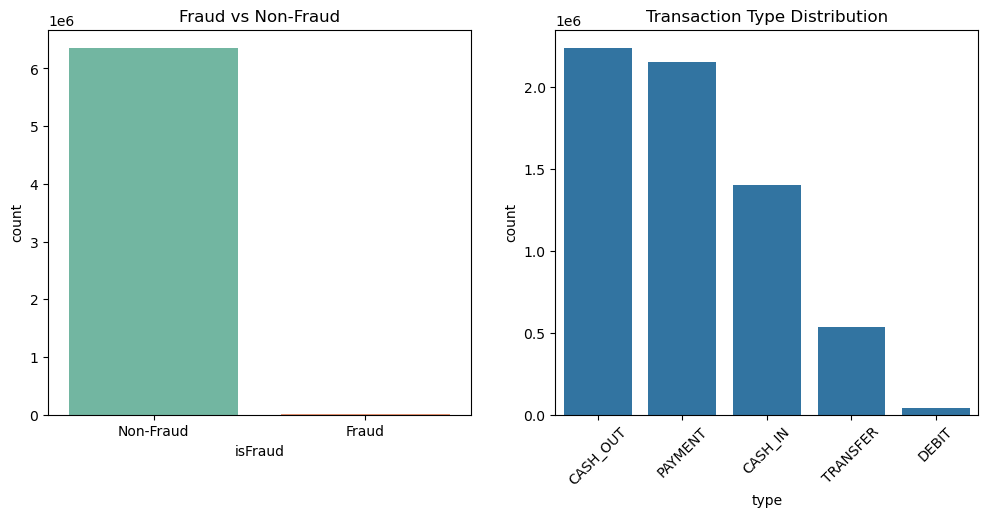

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Subplot 1: Fraud vs Non-Fraud
sns.countplot(x='isFraud', data=fd, palette='Set2', ax=axes[0])
axes[0].set_title("Fraud vs Non-Fraud")
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Non-Fraud', 'Fraud'])

# Subplot 2: (Example - Transaction Type Distribution)
sns.countplot(data=fd, x='type', order=fd['type'].value_counts().index, ax=axes[1])
axes[1].set_title("Transaction Type Distribution")
axes[1].tick_params(axis='x', rotation=45)

plt.show()

# 1e6 means 1×10 by 6, or 1,000,000 (one million).
# It’s a shorthand matplotlib (and many plotting libraries) use for large numbers on axes.

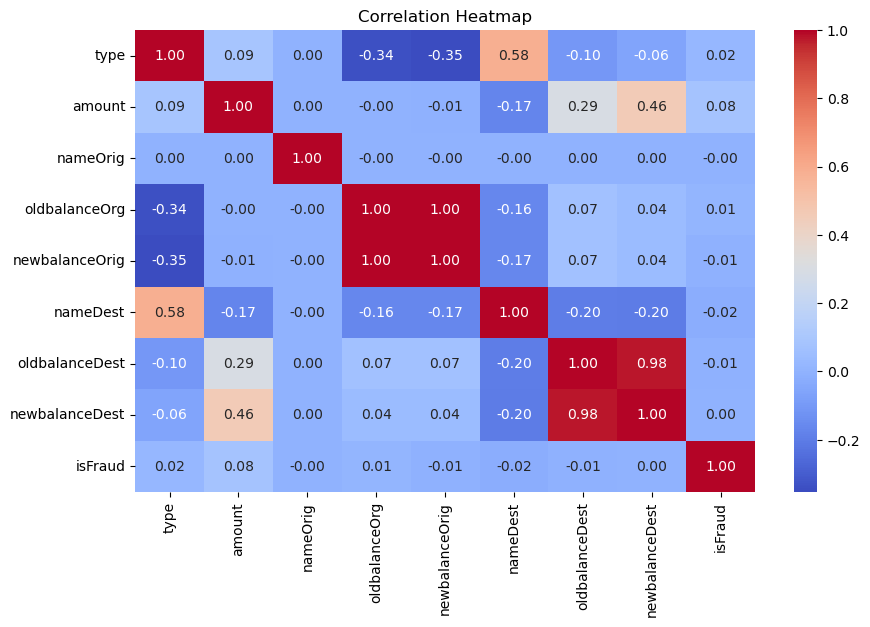

In [102]:
# Heatmap - Only numeric columns
numeric_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 
                'oldbalanceDest', 'newbalanceDest', 'isFraud']

plt.figure(figsize=(10,6))
sns.heatmap(fd.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [93]:
#Train test split

from sklearn.model_selection import train_test_split

fd_train, fd_test = train_test_split(fd, test_size=0.2, random_state=42, stratify=fd['isFraud'])

fd_train_x = fd_train.drop('isFraud', axis=1)
fd_train_y = fd_train['isFraud']

fd_test_x = fd_test.drop('isFraud', axis=1)
fd_test_y = fd_test['isFraud']

In [115]:
Fraud = fd_train.isFraud[fd_train.isFraud == 1].value_counts()
Non_Fraud = fraud = fd_train.isFraud[fd_train.isFraud == 0].value_counts()

print(Fraud, Non_Fraud)

isFraud
1    6570
Name: count, dtype: int64 isFraud
0    5083526
Name: count, dtype: int64


In [ ]:
# Class is highly imbalanced, hence using Undersampling and Oversampling to keep a balance between both classes. 

In [117]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import pandas as pd

# Step 1: Train-test split (keep test set untouched)
fd_train, fd_test = train_test_split(fd, test_size=0.2, random_state=42, stratify=fd['isFraud'])

# Step 2: Split X and y
fd_train_x = fd_train.drop('isFraud', axis=1)
fd_train_y = fd_train['isFraud']

fd_test_x = fd_test.drop('isFraud', axis=1)
fd_test_y = fd_test['isFraud']

# Step 3: SMOTE + RandomUnderSampler pipeline
smote = SMOTE(sampling_strategy=0.1, random_state=42)   # Increase frauds to 10% of non-fraud
under = RandomUnderSampler(sampling_strategy=0.5, random_state=42)  # Keep non-frauds 2x frauds

pipeline = Pipeline(steps=[
    ('smote', smote),
    ('under', under)
])

# Step 4: Apply on training set
fd_train_x_resampled, fd_train_y_resampled = pipeline.fit_resample(fd_train_x, fd_train_y)

# Step 5: Check final class balance
print("After Resampling (Train set):")
print(pd.Series(fd_train_y_resampled).value_counts())

# Now use:
# - fd_train_x_resampled and fd_train_y_resampled to train models
# - fd_test_x and fd_test_y to evaluate performance (unaltered real-world distribution)


After Resampling (Train set):
isFraud
0    1016704
1     508352
Name: count, dtype: int64


In [14]:
# ---------------------------------------------- MODEL BUILDING ----------------------------------------------

In [119]:
from sklearn.metrics import confusion_matrix, classification_report

In [145]:
#1. Baseline type- Logistic regression

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(fd_train_x_resampled, fd_train_y_resampled)

logreg_pred = logreg.predict(fd_test_x)

tab = confusion_matrix(fd_test_y, logreg_pred)

# Evaluate
print("------ Confusion Matrix ------")
cm = confusion_matrix(fd_test_y, logreg_pred)
print(cm)

print("\n------ Classification Report ------")
print(classification_report(fd_test_y, logreg_pred, digits=4))

------ Confusion Matrix ------
[[1232844   38037]
 [    199    1444]]

------ Classification Report ------
              precision    recall  f1-score   support

           0     0.9998    0.9701    0.9847   1270881
           1     0.0366    0.8789    0.0702      1643

    accuracy                         0.9700   1272524
   macro avg     0.5182    0.9245    0.5275   1272524
weighted avg     0.9986    0.9700    0.9835   1272524



In [147]:
#2. Tree-based type- Decision tree 

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(class_weight = 'balanced')
dt.fit(fd_train_x_resampled, fd_train_y_resampled)

dt_pred = dt.predict(fd_test_x)

tab = confusion_matrix(fd_test_y, dt_pred)

print('-- Confusion matrix --')
print(tab)

print('----------------------- Classification report -------------')
print(classification_report(fd_test_y, dt_pred))

-- Confusion matrix --
[[1268974    1907]
 [     25    1618]]
----------------------- Classification report -------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.46      0.98      0.63      1643

    accuracy                           1.00   1272524
   macro avg       0.73      0.99      0.81   1272524
weighted avg       1.00      1.00      1.00   1272524



In [152]:
#3. Ensemble type- Random forest

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(fd_train_x_resampled, fd_train_y_resampled)

rfc_pred = rfc.predict(fd_test_x)
tab = confusion_matrix(fd_test_y, rfc_pred)

print('-- Confusion matrix --')
print(tab)

print('----------------------- Classification report -------------')
print(classification_report(fd_test_y, rfc_pred))

-- Confusion matrix --
[[1268683    2198]
 [     37    1606]]
----------------------- Classification report -------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.42      0.98      0.59      1643

    accuracy                           1.00   1272524
   macro avg       0.71      0.99      0.79   1272524
weighted avg       1.00      1.00      1.00   1272524



In [126]:
#4. Distance type - KNN

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(fd_train_x, fd_train_y)

knn_pred = knn.predict(fd_test_x)

tab = confusion_matrix(fd_test_y, knn_pred)

print('-- Confusion matrix --')
print(tab)

print('----------------------- Classification report -------------')
print(classification_report(fd_test_y, knn_pred))

-- Confusion matrix --
[[1270764     117]
 [    774     869]]
----------------------- Classification report -------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.88      0.53      0.66      1643

    accuracy                           1.00   1272524
   macro avg       0.94      0.76      0.83   1272524
weighted avg       1.00      1.00      1.00   1272524



In [154]:
#5. Boosting type - XGBoost

from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(fd_train_x_resampled, fd_train_y_resampled)

xgb_pred = xgb.predict(fd_test_x)

tab = confusion_matrix(fd_test_y, xgb_pred)

print('-- Confusion matrix --')
print(tab)

print('----------------------- Classification report -------------')
print(classification_report(fd_test_y, xgb_pred))

-- Confusion matrix --
[[1268033    2848]
 [     14    1629]]
----------------------- Classification report -------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.36      0.99      0.53      1643

    accuracy                           1.00   1272524
   macro avg       0.68      0.99      0.77   1272524
weighted avg       1.00      1.00      1.00   1272524



In [128]:
#6. Neural network models

import tensorflow as tf
import keras

model = tf.keras.models.Sequential() #initilazing the model

model.add(tf.keras.layers.Dense(250, activation = tf.nn.relu)) 
model.add(tf.keras.layers.Dense(500, activation = tf.nn.relu)) 
model.add(tf.keras.layers.Dense(1000, activation = tf.nn.relu)) 

model.add(tf.keras.layers.Dense(2, activation = tf.nn.softmax)) 

adam = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer = adam, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [155]:
model.fit(fd_train_x_resampled, fd_train_y_resampled, epochs = 10, validation_split= 0.2, batch_size= 1000)

Epoch 1/10
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.8335 - loss: 0.4811 - val_accuracy: 4.7211e-04 - val_loss: 1.8014
Epoch 2/10
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.8337 - loss: 0.4458 - val_accuracy: 4.7211e-04 - val_loss: 1.7317
Epoch 3/10
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.8339 - loss: 0.4455 - val_accuracy: 4.7211e-04 - val_loss: 1.8108
Epoch 4/10
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.8333 - loss: 0.4466 - val_accuracy: 4.7211e-04 - val_loss: 1.8381
Epoch 5/10
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.8352 - loss: 5.8700 - val_accuracy: 0.0619 - val_loss: 1.7199
Epoch 6/10
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.8407 - loss: 0.5436 - val_accuracy: 0.0000e+00 - val_loss: 1.7413
Epoch 7/10
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.8334 - loss: 0.4411 - val_accuracy: 0.0000e+00 - val_loss: 1.6869
Epoch 8/10
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/s

In [130]:
pred = model.predict(fd_test_x)
pred_classes = pred.argmax(axis = 1)

39767/39767 ━━━━━━━━━━━━━━━━━━━━ 38s 966us/step


In [131]:
tab = confusion_matrix(fd_test_y, pred_classes)
print(tab)
print(classification_report(fd_test_y, pred_classes))

[[1270881       0]
 [   1639       4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       1.00      0.00      0.00      1643

    accuracy                           1.00   1272524
   macro avg       1.00      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524



In [156]:
#7. Specially for anomoly detection

from sklearn.ensemble import IsolationForest

ifor = IsolationForest(n_estimators=100)
ifor.fit(fd_train_x_resampled, fd_train_y_resampled)

IsolationForest()

In [157]:
ifor_pred = ifor.predict(fd_test_x)
ifor_pred_mapped = [1 if val == -1 else 0 for val in ifor_pred]  # 1: fraud, 0: normal

print(confusion_matrix(fd_test_y, ifor_pred_mapped))
print(classification_report(fd_test_y, ifor_pred_mapped))

[[1123562  147319]
 [   1411     232]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.94   1270881
           1       0.00      0.14      0.00      1643

    accuracy                           0.88   1272524
   macro avg       0.50      0.51      0.47   1272524
weighted avg       1.00      0.88      0.94   1272524



In [ ]:
# Since Random forest was giving best output, choose it to further optimise results

In [167]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 600),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced'],
}

rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(rf, param_distributions=param_dist,
                                   n_iter=30,  # Only 30 random models
                                   scoring='f1', 
                                   cv=3, n_jobs=-1, verbose=2)

random_search.fit(fd_train_x_resampled, fd_train_y_resampled)


Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'class_weight': ['balanced'],
                                        'max_depth': [10, 20, 30, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000029BE840B920>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000029BE8215970>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000029C456A2E70>},
                   scoring='f1', verbose=2)

In [169]:
print("Best Parameters:\n", random_search.best_params_)

Best Parameters:
 {'class_weight': 'balanced', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 335}


In [171]:
best_rf = random_search.best_estimator_

In [173]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = best_rf.predict(fd_test_x)
print(confusion_matrix(fd_test_y, y_pred))
print(classification_report(fd_test_y, y_pred))

[[1269154    1727]
 [     26    1617]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.48      0.98      0.65      1643

    accuracy                           1.00   1272524
   macro avg       0.74      0.99      0.82   1272524
weighted avg       1.00      1.00      1.00   1272524



In [178]:
# OLD # -- Confusion matrix --
# [[1268683    2198]
#  [     37    1606]]
# ----------------------- Classification report -------------
#               precision    recall  f1-score   support

#            0       1.00      1.00      1.00   1270881
#            1       0.42      0.98      0.59      1643 

#     accuracy                           1.00   1272524
#    macro avg       0.71      0.99      0.79   1272524
# weighted avg       1.00      1.00      1.00   1272524